<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Auto_Eval_Refin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(filepath, header=0)

In [ ]:
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [ ]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
  width = 12
  height = 10
  plt.figure(figsize=(width,height))

  ax1 = sns.kdeplot(RedFunction, color='r', label=RedName)
  ax2 = sns.kdeplot(BlueFunction, color='b', label=BlueName, ax=ax1)

  plt.title(Title)
  plt.xlabel('Price (in dollars)')
  plt.ylabel('Proportion of Cars')

  plt.legend()

  plt.show()
  plt.close()

In [ ]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
  width = 12
  height = 10
  plt.figure(figsize=(width,height))

  xmax = max([xtrain.values.max(), xtest.values.max()])
  xmin = min([xtrain.values.min(), xtest.values.min()])

  x = np.arange(xmin, xmax, 0.1)

  plt.plot(xtrain, y_train, 'ro', label='Training Data')
  plt.plot(xtest, y_test, 'go', label='Test Data')
  plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label='Predicted Function')
  plt.ylim([-10000, 60000])
  plt.ylabel('Price')

  plt.legend()

  plt.show()
  plt.close()

In [ ]:
y_data =df['price']
x_data = df.drop('price', axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:", x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [ ]:
df.shape[0]

201

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
print("number of test samples :", x_test1.shape[0])
print("number of training samples:", x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [ ]:
lre = LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [ ]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [ ]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [ ]:
lre.fit(x_train1[['horsepower']], y_train1)

LinearRegression()

In [ ]:
lre.score(x_test1[['horsepower']], y_test1)

0.7139364665406973

In [ ]:
lre.score(x_train1[['horsepower']], y_train1)

0.5754067463583004

In [ ]:
#The data (x_data) are partitioned in 4 parts (folds), in which 3 of them are used to train the model
#and the other one to test it. For this arrange we get the first R^2 score. Then the process is repeated
# with another combination of 3 folds for training and 1 for testing and again obtain the R^2.
#This is itreated until we get 4 R^2 scores stored in Rcross.
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [ ]:
#it contains the R^2 for each one of the 4 partitions (cv=4) that use diferent test fold each time
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [ ]:
print("The mean R^2 of the folds is:", Rcross.mean(),"\nand the standard deviation is:", Rcross.std())

The mean R^2 of the folds is: 0.522009915042119 
and the standard deviation is: 0.291183944475603


In [ ]:
Neg_mse = -1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')
Neg_mse

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [ ]:
print("The average MSE of the folds is:", Neg_mse.mean(),"\nand the standard deviation is:", Neg_mse.std())

The average MSE of the folds is: 23525298.54198599 
and the standard deviation is: 11997952.238146858


In [ ]:
Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
Rcross1

array([0.59015621, 0.44319613])

In [ ]:
print("The mean R^2 of the folds is:", Rcross1.mean())

The mean R^2 of the folds is: 0.5166761697127429


In [ ]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [ ]:
mean_squared_error(y_data, yhat)

23509024.13550977

In [ ]:
lre.score(x_data[['horsepower']], y_data)

0.6431569218155395

In [ ]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [ ]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [ ]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

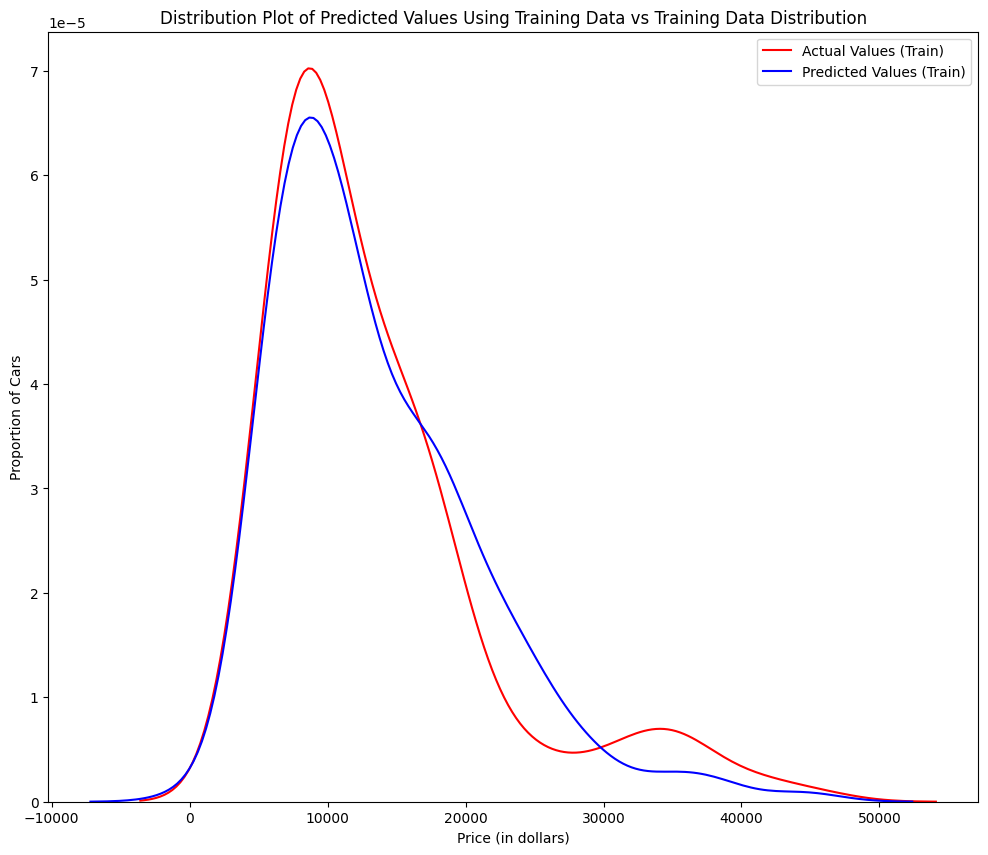

In [ ]:
Title = 'Distribution Plot of Predicted Values Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [ ]:
print("The R-squared for lr-train model is:", lr.score(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_train))

The R-squared for lr-train model is: 0.8142470221363208


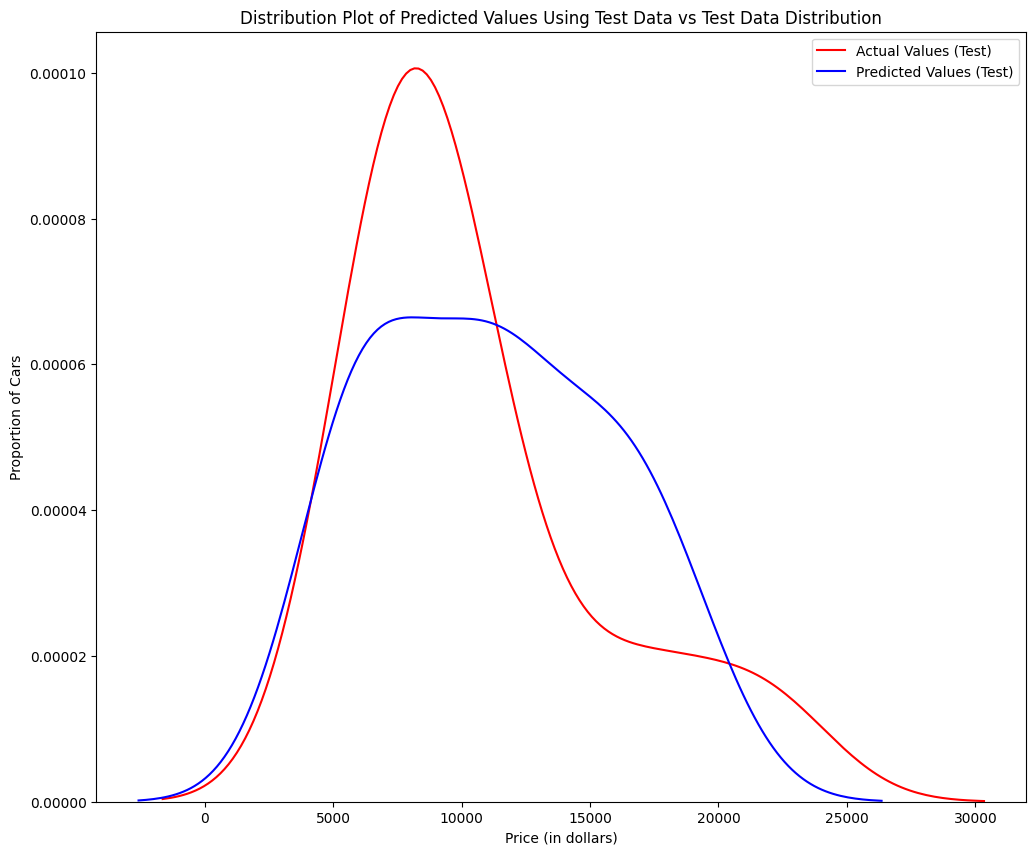

In [ ]:
Title='Distribution Plot of Predicted Values Using Test Data vs Test Data Distribution'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [ ]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [ ]:
x_train_pr.shape

(110, 6)

In [ ]:
x_train[['horsepower']].shape

(110, 1)

In [ ]:
x_test_pr.shape

(91, 6)

In [ ]:
x_test[['horsepower']].shape

(91, 1)

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [ ]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [ ]:
Dict = {'Predicted values:':yhat[0:5].ravel().tolist(), 'True values:':y_test[0:5].ravel().tolist()}
print(pd.DataFrame(Dict))

   Predicted values:  True values:
0        6728.655619        6295.0
1        7307.987823       10698.0
2       12213.787710       13860.0
3       18893.248040       13499.0
4       19995.951951       15750.0


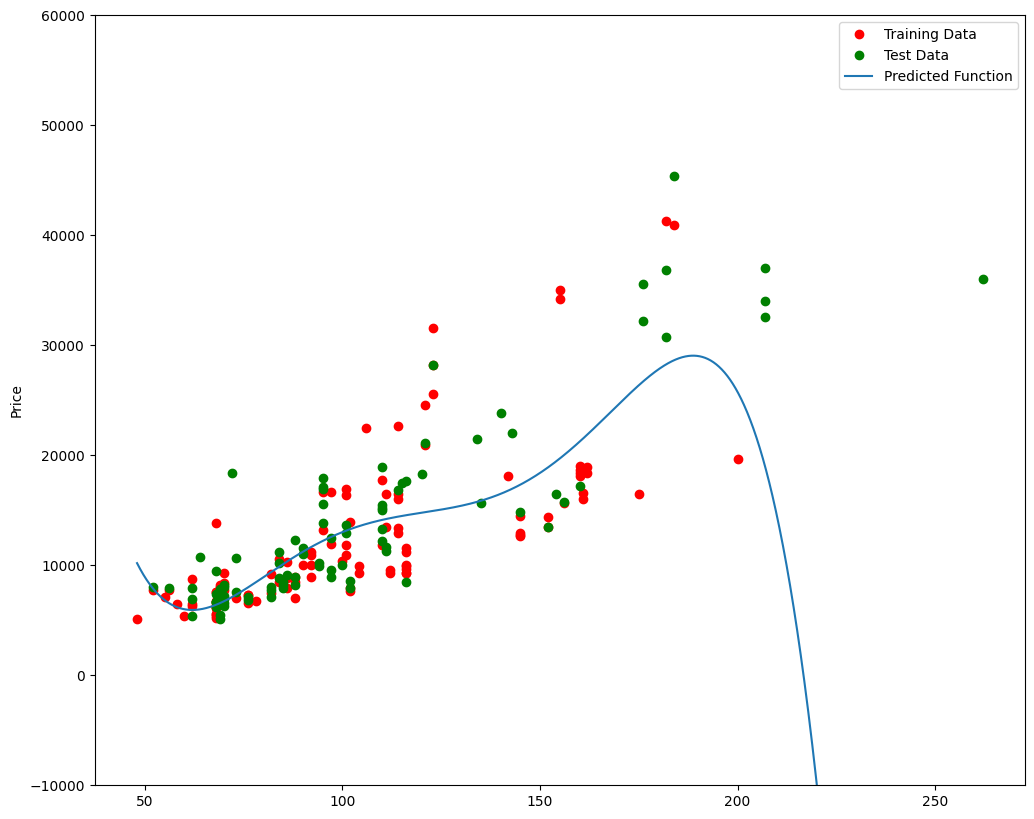

In [ ]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [ ]:
poly.score(x_train_pr, y_train)

0.5567716902120254

In [ ]:
poly.score(x_test_pr, y_test)

-29.871340302043684

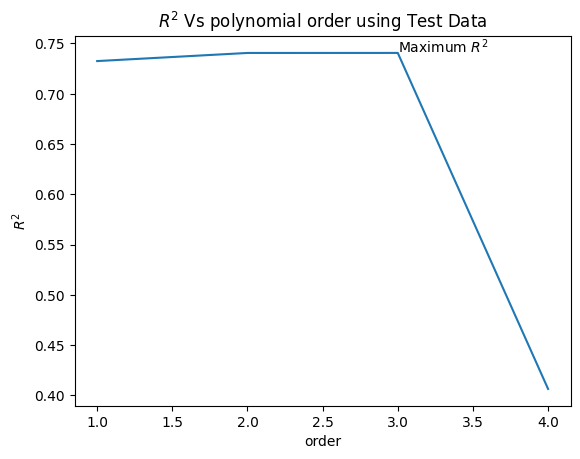

In [ ]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])

  lr.fit(x_train_pr, y_train)

  Rsqu_test.append(lr.score(x_test_pr, y_test))

max_index = np.argmax(Rsqu_test)
max_x = order[max_index]
max_y = Rsqu_test[max_index]
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('$R^2$')
plt.title('$R^2$ Vs polynomial order using Test Data')
plt.text(max_x, max_y, 'Maximum $R^2$')
plt.show()
plt.close()

In [ ]:
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=3)

In [ ]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

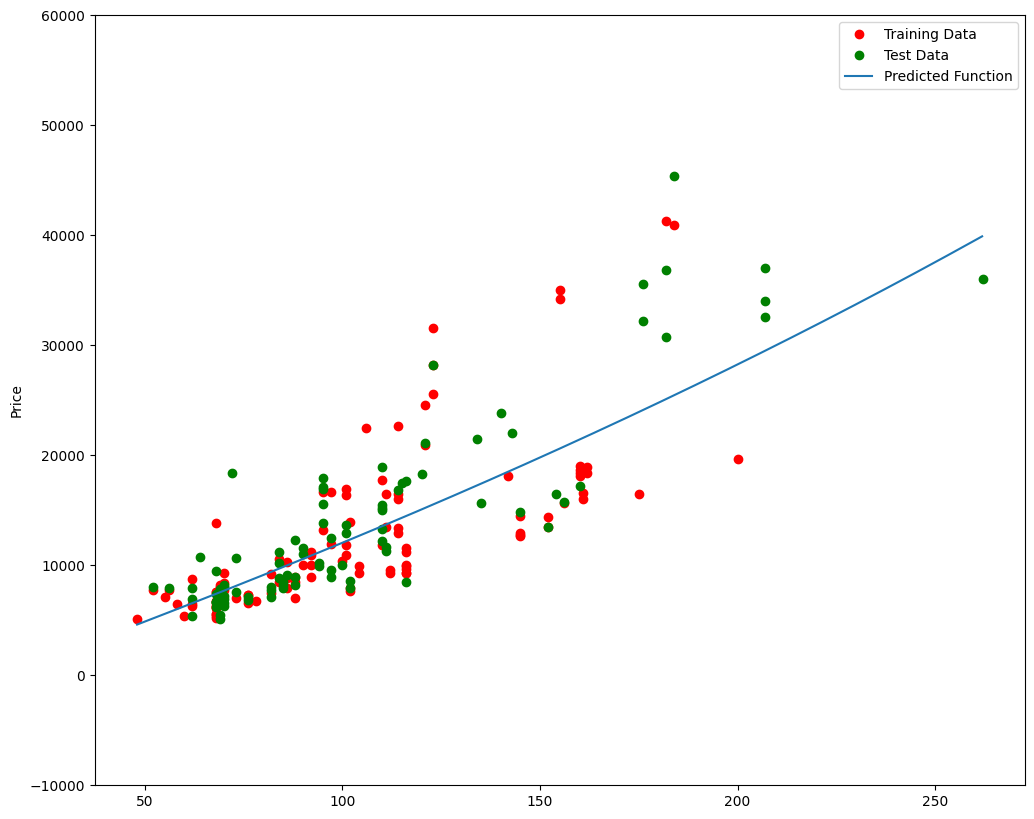

In [ ]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [ ]:
poly.score(x_test_pr, y_test)

0.7406204232729607

In [ ]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [ ]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr1 = PolynomialFeatures(degree=2)
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

In [ ]:
x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']].shape

(110, 4)

In [ ]:
x_train_pr1.shape

(110, 15)

In [ ]:
x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']].shape

(91, 4)

In [ ]:
x_test_pr1.shape

(91, 15)

In [ ]:
poly1 = LinearRegression()
poly1.fit(x_train_pr1, y_train)

LinearRegression()

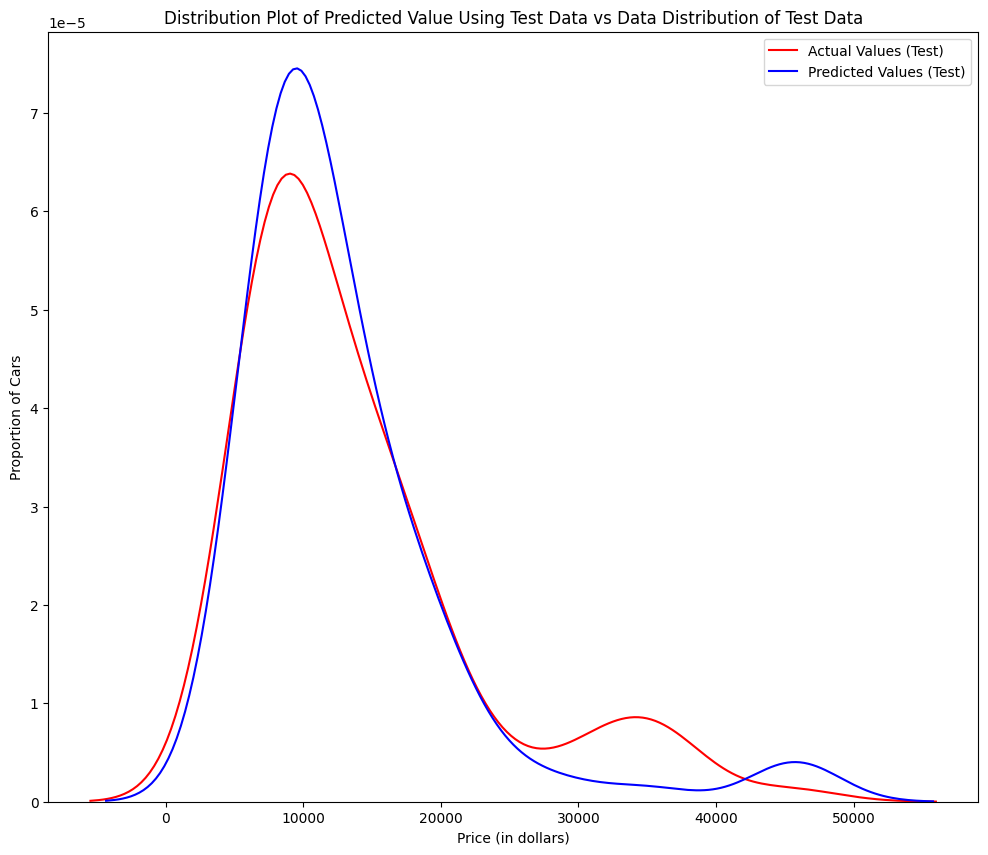

In [ ]:
yhat_test1 = poly1.predict(x_test_pr1)

Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [ ]:
mse_pr = mean_squared_error(y_test, yhat_test1)
r2_score_pr = r2_score(y_test, yhat_test1)
print('MSE for multi-variable polynomial yhat_test1 is:', mse_pr)
print('R^2 for multi-variable polynomial yhat_test1 is:', r2_score_pr)

MSE for multi-variable polynomial yhat_test1 is: 29553337.399719357
R^2 for multi-variable polynomial yhat_test1 is: 0.6045072506873311


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures()
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [ ]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [ ]:
#automatically finding the best alpha value in a specific (manually) predifined partition
#of the data set into train and test (x_train_pr, X_test_pr)
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:18<00:00, 55.38it/s, Test Score=0.564, Train Score=0.859]


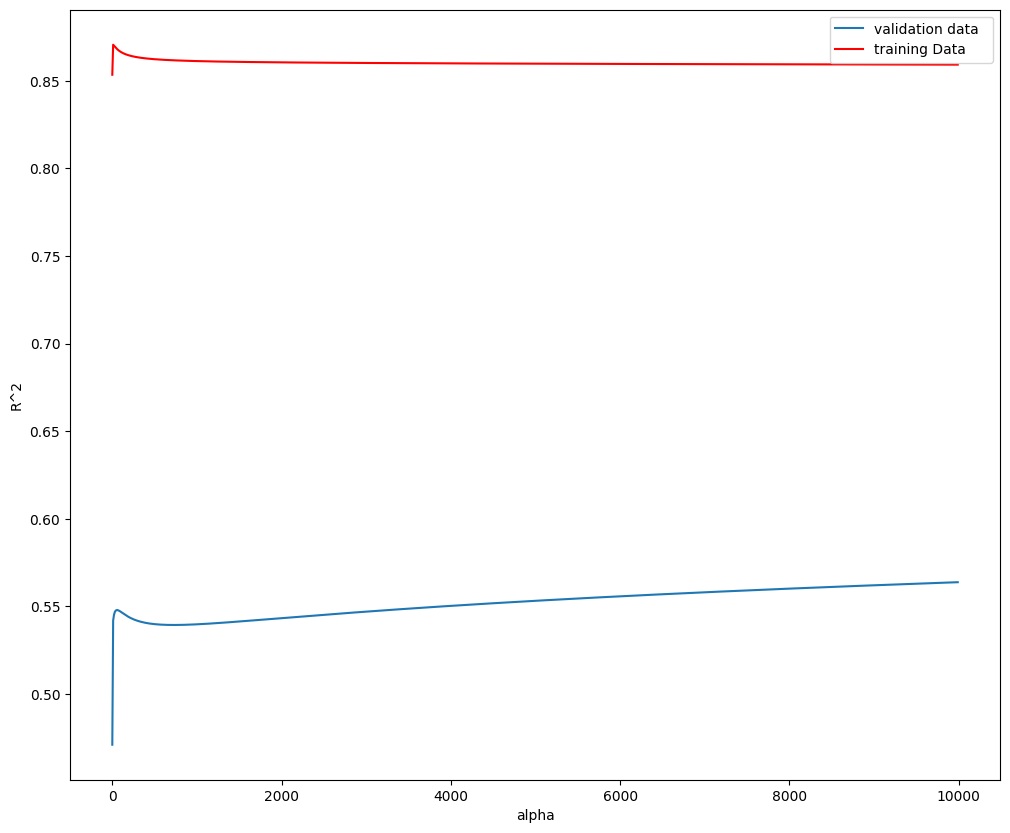

In [ ]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures()
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
RigeModel = Ridge(alpha=10)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4].round(0))
print('test set :', y_test[0:4].values)
mse_pr = mean_squared_error(y_test, yhat)
r2_score_pr = RigeModel.score(x_test_pr, y_test)
print('MSE for multi-variable polynomial yhat is:', mse_pr)
print('R^2 for multi-variable polynomial yhat is:', r2_score_pr)

predicted: [ 6472.  9537. 21078. 19751.]
test set : [ 6295. 10698. 13860. 13499.]
MSE for multi-variable polynomial yhat is: 34234851.705602
R^2 for multi-variable polynomial yhat is: 0.5418576440206506


In [ ]:
#Grid Search: automatically finding the best hyperparameter (alpha in this case) value
#while spliting the data in 4 folds by itself and testing all combination of folds.
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [ ]:
RR= Ridge()
RR

Ridge()

In [ ]:
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [ ]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [ ]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [ ]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

The best R^2 is: 0.8415280556078759


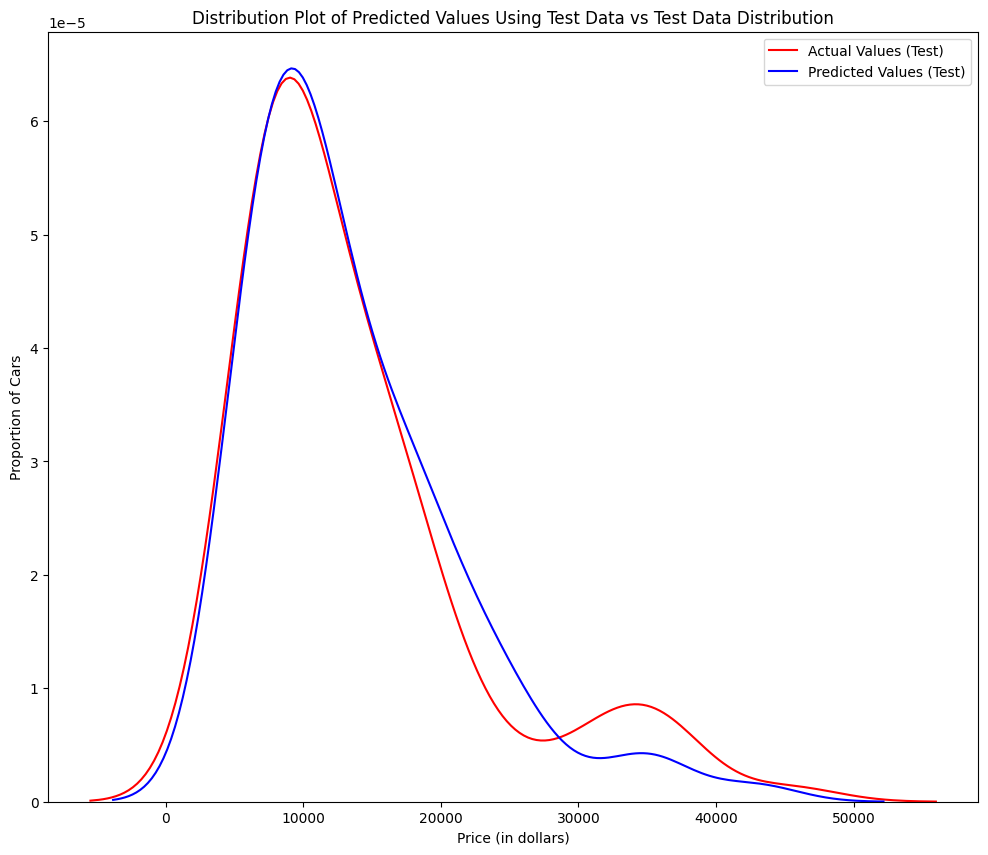

In [ ]:
parameters1= [{'alpha': [0.001,0.01,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR= Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x_data[['symboling','normalized-losses', 'city-L/100km', 'wheel-base',\
                  'horsepower', 'length', 'width', 'curb-weight',\
                  'engine-size', 'bore', 'highway-mpg']], y_data)
BestRR = Grid1.best_estimator_
R_square = BestRR.score(x_test[['symboling','normalized-losses', 'city-L/100km', 'wheel-base',\
                  'horsepower', 'length', 'width', 'curb-weight',\
                  'engine-size', 'bore', 'highway-mpg']], y_test)
print('The best R^2 is:', R_square)
yhat_test = BestRR.predict(x_test[['symboling','normalized-losses', 'city-L/100km', 'wheel-base',\
                  'horsepower', 'length', 'width', 'curb-weight',\
                  'engine-size', 'bore', 'highway-mpg']])
Title = 'Distribution Plot of Predicted Values Using Test Data vs Test Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)", "Predicted Values (Test)", Title)

The mean R^2 of the folds is: 0.6087371776024864 
and the standard deviation is: 0.19767070537530051


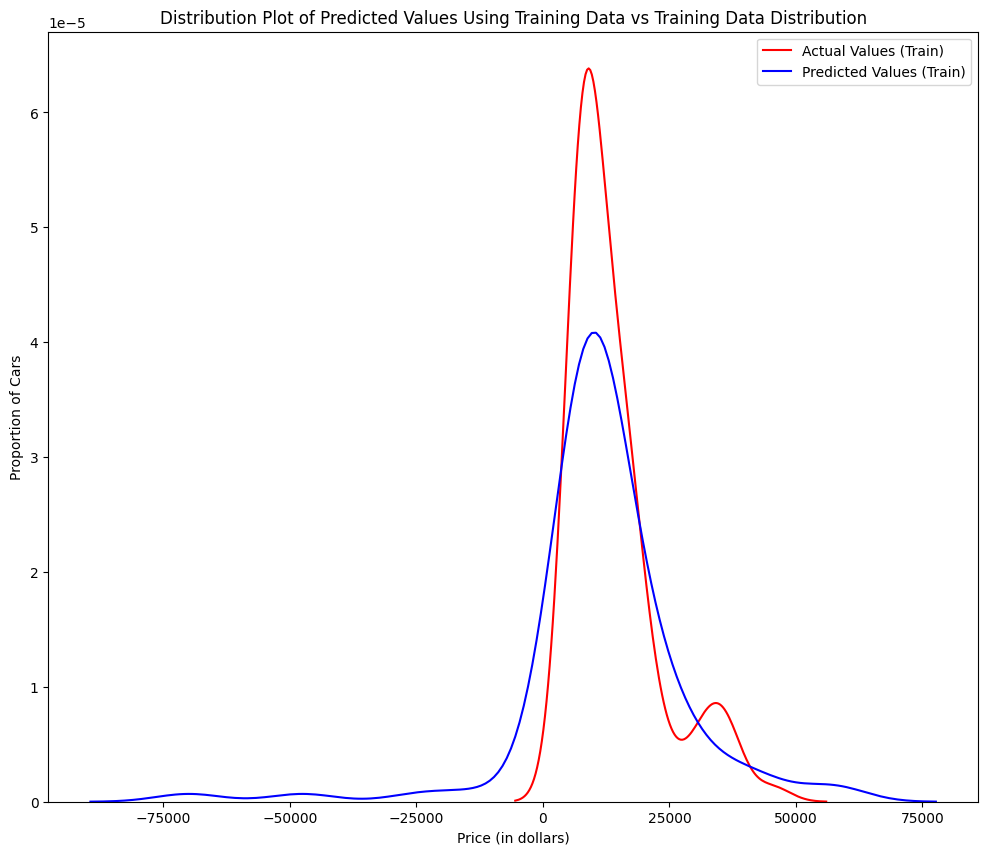

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures()
x_train_pr = pr.fit_transform(x_train[['symboling','normalized-losses', 'city-L/100km', 'wheel-base',\
                  'horsepower', 'length', 'width', 'curb-weight',\
                  'engine-size', 'bore', 'highway-mpg']])
x_test_pr = pr.fit_transform(x_test[['symboling','normalized-losses', 'city-L/100km', 'wheel-base',\
                  'horsepower', 'length', 'width', 'curb-weight',\
                  'engine-size', 'bore', 'highway-mpg']])
lre = LinearRegression()
lre.fit(x_train_pr, y_train)
Rcross = cross_val_score(lre, x_data[['symboling','normalized-losses', 'city-L/100km', 'wheel-base',\
                  'horsepower', 'length', 'width', 'curb-weight',\
                  'engine-size', 'bore', 'highway-mpg']], y_data, cv=4)
Rcross
print("The mean R^2 of the folds is:", Rcross.mean(),"\nand the standard deviation is:", Rcross.std())
yhat_test = lre.predict(x_test_pr)
Title = 'Distribution Plot of Predicted Values Using Training Data vs Training Data Distribution'
DistributionPlot(y_test, yhat_test, "Actual Values (Train)", "Predicted Values (Train)", Title)